# HYPOTHESIS TESTING
 A hypothesis is a statement or assumption that we want to test using data.
 Hypothesis testing helps us decide whether a result is real or just random chance.

 1. Null Hypothesis (H₀)

Means “Nothing changed”

Means “No effect”

Means “No relationship”

2. Alternative Hypothesis (H₁ or Ha)

Means “Something changed”

Means “There IS an effect”



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DataSet

In [ ]:
df=pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# Data Preprocessing

In [41]:
bp_no_disease=df[df["Heart Disease"]== 'Absence']["BP"]
bp_with_disease=df[df["Heart Disease"]== 'Presence']["BP"]
print(bp_no_disease)
print("-----------------")
print(bp_with_disease)

1      115
3      128
4      120
5      120
10     135
      ... 
263    130
265    172
266    120
267    140
268    140
Name: BP, Length: 150, dtype: int64
-----------------
0      130
2      124
6      130
7      110
8      140
      ... 
258    140
261    130
262    120
264    110
269    160
Name: BP, Length: 120, dtype: int64


Types of Hypothesis Tests

| Test                | Used When                  |
| ------------------- | -------------------------- |
| **t-test**          | Compare means              |
| **z-test**          | Large data, known variance |
| **Chi-square test** | Categorical data           |
| **ANOVA**           | More than 2 groups         |


# 1) T-TESTING
    -->it is used when population standard deviation is known or sample is large.

In [ ]:
from scipy import stats 
t_stat,p_value=stats.ttest_ind(bp_with_disease,bp_no_disease)
print(t_stat)
print(p_value)

2.574998726749989
0.010560951367793638
Reject Null Hypothesis(BP affect HeartDisease)


 - p-value (MOST IMPORTANT)

p-value tells us:

“If the null hypothesis is true, how likely is this result?”

Interpretation:

p ≤ 0.05 → Strong evidence → ❌ Reject H₀

p > 0.05 → Weak evidence → ✅ Accept H₀

In [47]:
alpha=0.05
if p_value<= alpha:
    decition="Reject Null Hypothesis(BP affect HeartDisease)"
else:
    decition="Fail to Reject Null Hypothesis(No strong effect)"
print(decition)

Reject Null Hypothesis(BP affect HeartDisease)


# Visualization

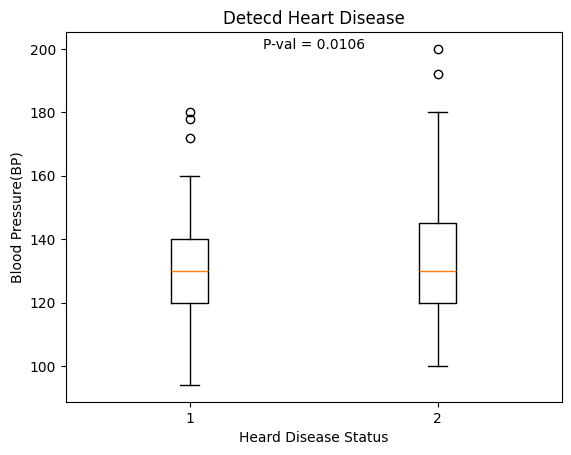

In [ ]:
# Step 3: Visualization
plt.figure()
plt.boxplot([bp_no_disease,bp_with_disease])
plt.title("Detecd Heart Disease")
plt.xlabel("Heart Disease Status")

plt.ylabel("Blood Pressure(BP)")

# Show p-value on graph
plt.text(1.5, max(bp_with_disease), 
         f"P-val = {p_value:.4f}", 
         ha='center')

plt.show()

# 2) Z-TEST 
        Z-test is a statistical method used to check whether a sample mean is significantly different from a known population mean.
        it is used when population standard deviation is known or sample is large
    
     Problem Statement:
        Does avg Blood Pressure(BP) of heart disease patients differ from normal BP?

Types of Z-Tests

| Test                | Used When                  |    Example |
| ------------------- | -------------------------- | ------------- |
| **One-Sample Z-Test**          |  Compare sample mean with population mean              | Heart disease BP vs Normal BP |
| **Two-Sample Z-Test**          | Compare two population means | BP of males vs females (σ known) |


In [ ]:
# Step 1 --> Heart disease BP data
bp_with_disease=df[df["Heart Disease"]== 'Presence']["BP"]
bp_heart_diseasse=np.array(bp_with_disease)

# population mean
population_mean=bp_heart_diseasse.mean()  # Normal BP
population_std=15    # Assumed population std dev
n=len(bp_heart_diseasse)

print(bp_heart_diseasse)
print(population_mean)
print(n)

[130 124 130 110 140 150 134 140 140 120 112 128 170 144 130 140 160 152
 126 118 110 160 150 136 138 174 120 130 150 136 108 120 142 146 120 150
 150 130 124 110 125 110 100 120 165 130 124 150 140 180 158 120 200 130
 120 122 152 120 117 108 112 120 125 145 140 192 123 112 110 132 140 178
 120 150 128 138 140 100 138 140 150 125 134 110 132 160 145 126 125 125
 125 140 160 125 170 128 110 135 130 130 132 145 118 128 160 120 180 140
 130 110 140 145 120 112 132 140 130 120 110 160]
134.44166666666666
120


# Z-test Calculation

In [ ]:
sample_mean=np.mean(bp_heart_diseasse)
z_score=(sample_mean-population_mean)/(population_std/np.sqrt(n))

# Probability of observing this result if H₀ is true
p_val=2*(1-stats.norm.cdf(abs(z_score))) # two -tailed

print("Sample Mean BP: ", sample_mean)
print("Z_Score: ",z_score )
print("P_value: ", p_val)

Sample Mean BP:  134.44166666666666
Z_Score:  0.0
P_value:  1.0


In [74]:
alpha=0.5
if p_val<=0.5:
    print("Reject Null Hypothesis: BP is significatly different")
else:
    print("Failed to reject Null Hypothesis")

Failed to reject Null Hypothesis


# Visualization

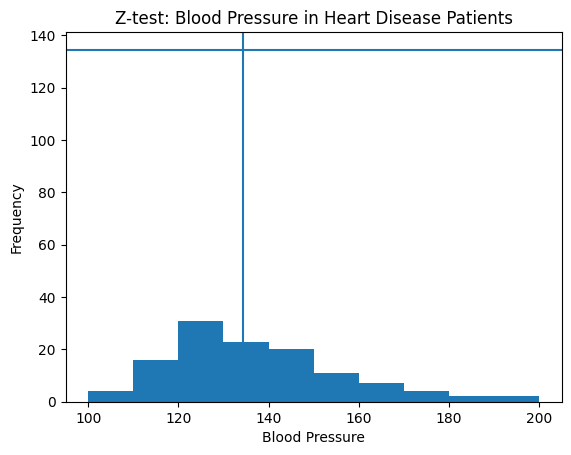

In [75]:
plt.figure()
plt.hist(bp_heart_diseasse)
plt.axhline(population_mean)
plt.axvline(sample_mean)
plt.title("Z-test: Blood Pressure in Heart Disease Patients")
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")
plt.show()

# 3) CHI-SQUARE TEST
    “Chi-Square test checks whether two categorical variables are related.”
    
    Use Chi-Squre test when:
        1. Data is categorical
        2. You want to check association/RelationShip
        3. Not mean, Not avg
     
     H0-- BP level and heart disease are independent(no relationship)
     H1-- BP level and heart disease are related

In [ ]:
from scipy.stats import chi2_contingency

# Step 2: Convert BP to category
df["BP_Level"]=df["BP"].apply(lambda x: "High" if x>=130 else "Normal")
print(df["BP_Level"])

0        High
1      Normal
2      Normal
3      Normal
4      Normal
        ...  
265      High
266    Normal
267      High
268      High
269      High
Name: BP_Level, Length: 270, dtype: object


# Create Continhency table

In [65]:
table=pd.crosstab(df["BP_Level"],df["Heart Disease"])
print(table)

Heart Disease  Absence  Presence
BP_Level                        
High                78        69
Normal              72        51


# Chi-Squre Test

In [ ]:
chi2,p_value,dof,expected=chi2_contingency(table)
print("Chi-Squre val: ", chi2)
print("P_val: ", p_value)
#Decision
alpha=0.05
if p_value<=alpha:
    print("Reject Null Hypothesis: BP is related to Heart Disease")
else:
    print("Failed to Reject Null Hypothesis")

Chi-Squre val:  0.6064584370333509
P_val:  0.43612439581247064
Failed to Reject Null Hypothesis


# Vizualization

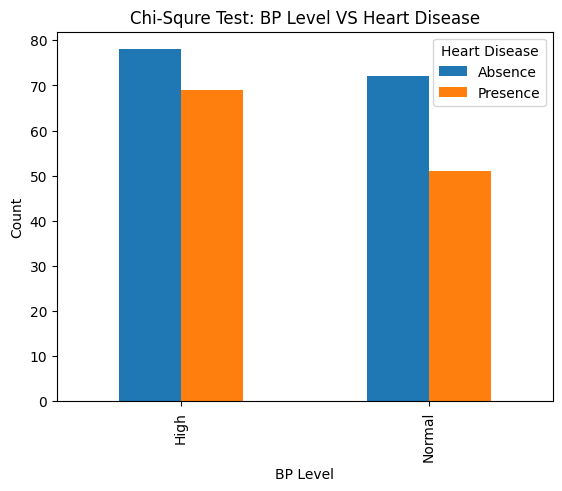

In [68]:
table.plot(kind="bar")
plt.title("Chi-Squre Test: BP Level VS Heart Disease")
plt.xlabel("BP Level")
plt.ylabel("Count")
plt.show()

# A/B Testing
    -- it is just hypothesis testing with two groups
    group A - Normal BP(Control)
    group B - High BP(test)

    H0 - Heart disease rate is same in both groups
    H1 - Heart disease rate is higher in High BP group

In [ ]:
from scipy.stats import ttest_ind

# Encode heart disease
df["HD_Val"]=df["Heart Disease"].map({"Absence":0, "Presence":1})
print(df["HD_Val"])

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: HD_Val, Length: 270, dtype: int64


# Create A/B Group and Test

In [96]:
# Create Groups
group_A=df[df["BP_Level"]=="Normal"]["HD_Val"]
group_B=df[df["BP_Level"]=="High"]["HD_Val"]

# Testing
t_stat,p_value=ttest_ind(group_B,group_A, equal_var=False)
print("T-Statistic: ", t_stat)
print("P-Value: ", p_value)

T-Statistic:  0.9007089323452259
P-Value:  0.36857429003994246


In [97]:
#Decision
alpha=0.05
if p_value<=alpha:
    print("Reject Null Hypothesis: High BP increases heart disease")
else:
    print("Failed to Reject Null Hypothesis")

Failed to Reject Null Hypothesis


# Visualization

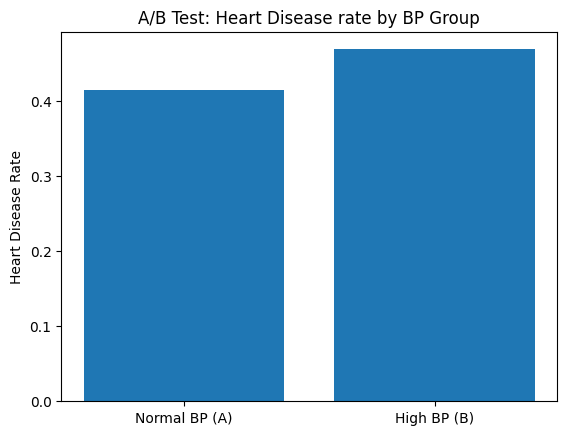

In [99]:
means=[group_A.mean(),group_B.mean()]

plt.figure()
plt.bar(["Normal BP (A)", "High BP (B)"], means)
plt.title("A/B Test: Heart Disease rate by BP Group")
plt.ylabel("Heart Disease Rate")
plt.show()